### **What is Data Science?**

**What is Data Science and have you felt its hidden impact in your decisions**

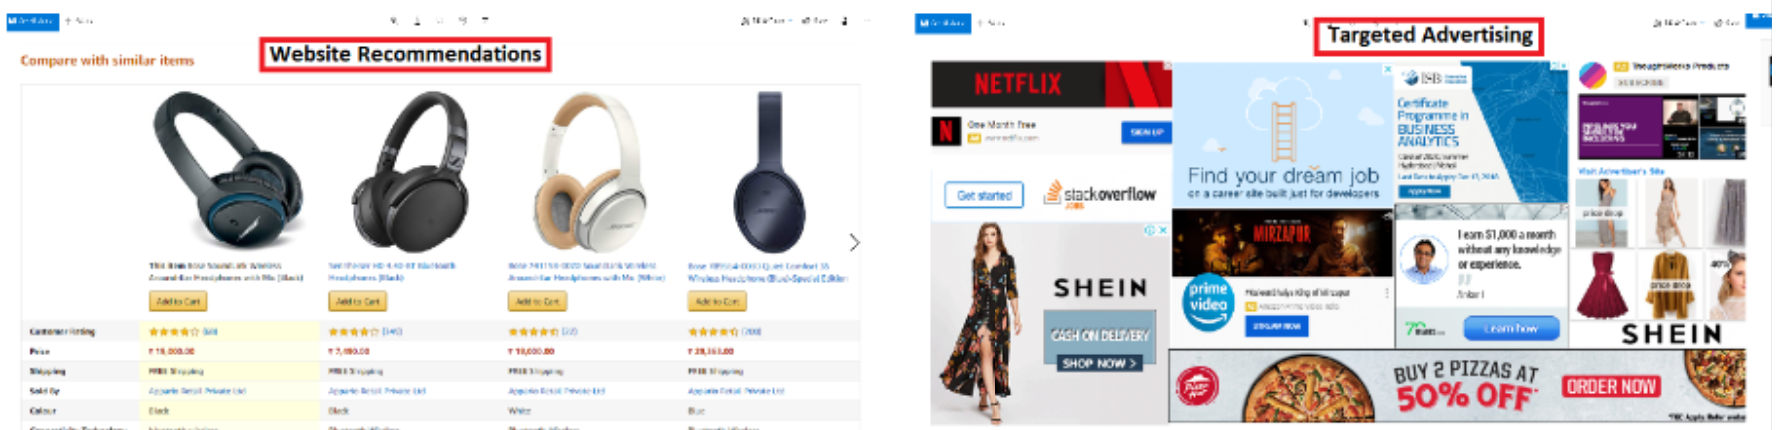

### **Skills needed for Data Scientist**

**Are you a Data Scientists** 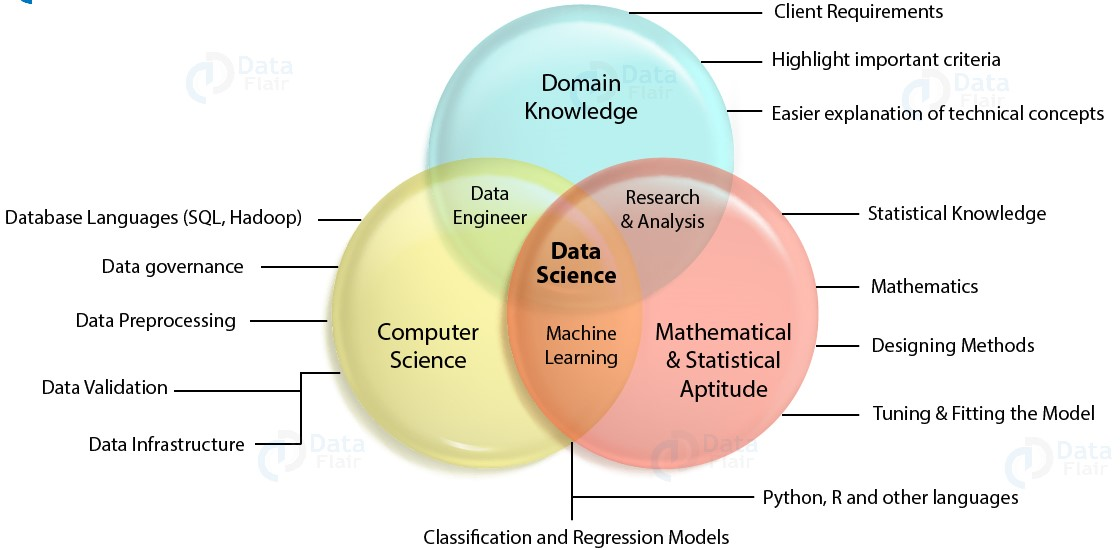

### **Applications of Datascience**

**Is it just online shopping or Netflix using Data Science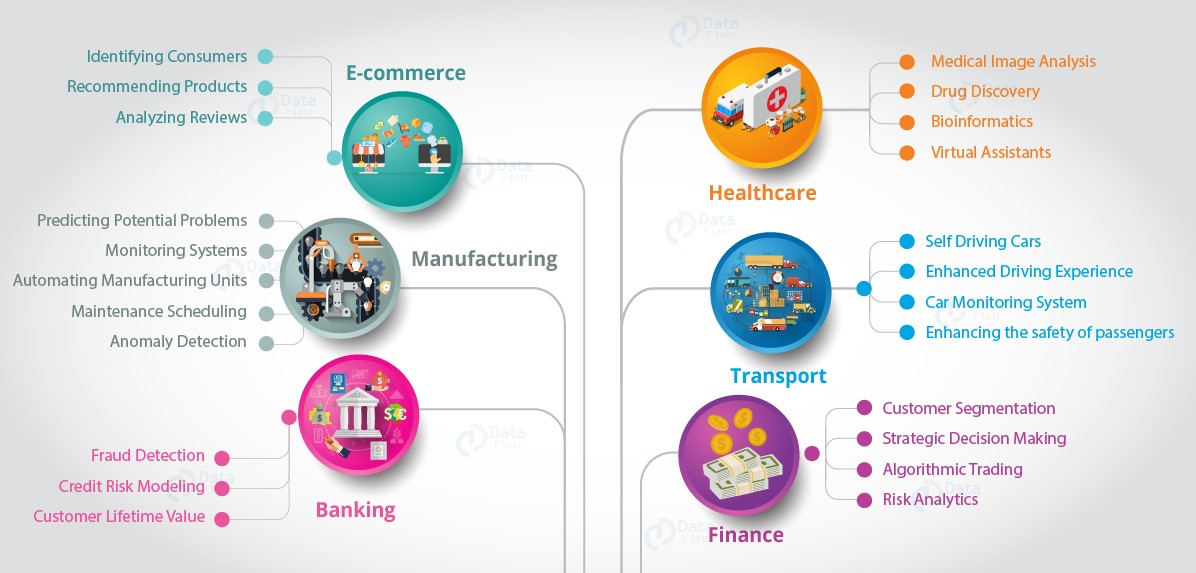**

### **What is Algorithmic Trading?**

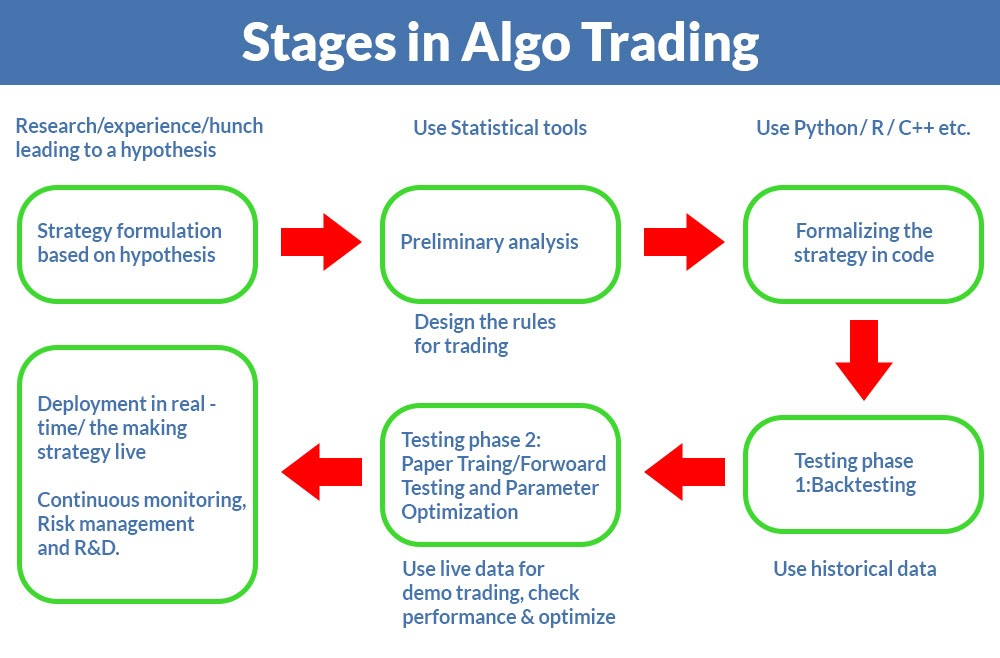

### **Strategy Formulation And Preliminary Analysis**

#### **Strategy Formulation**

The strategy is plain **15 minutes** - **O**pening **R**ange **B**reakout.

The system calculates what’s the first 15 mins **High** and **Low** of the stock, so after 9:30 AM, when the high range is broken, **BUY** order is triggered with 15 mins low as to stop loss. 

If a low range is triggered, then **SELL** order is triggered with 15 mins high as to stop loss. 

No Targets or Trailing stop loss used, all position gets closed by EOD.



#### **Preliminary Analysis**
![Ax[link text](https:// [link text](https://))isBank.png](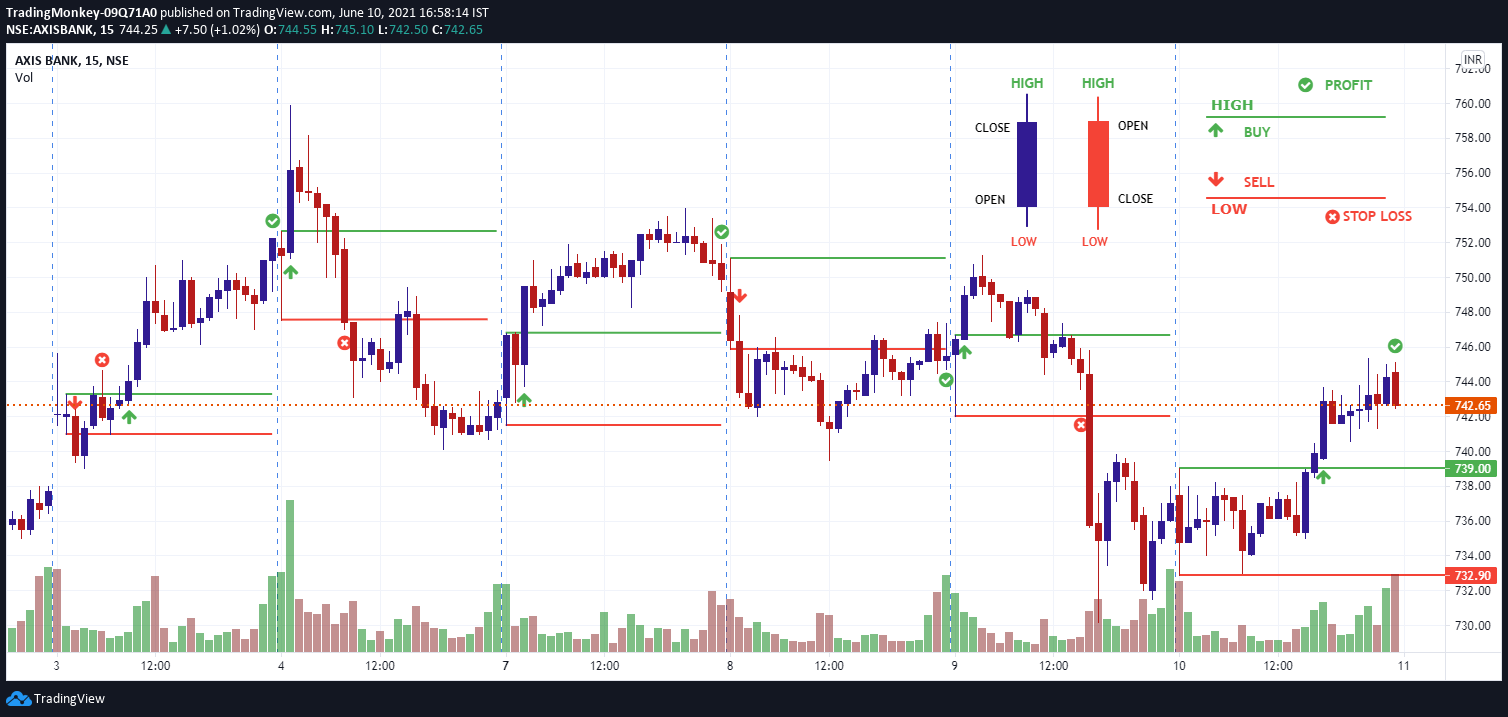)

### **Backtest Analysis : ORB(Opening Range Breakout Strategy) on Broadridge stock**

#### **Step1: Import the required libraries**

In [ ]:
!pip install yfinance

In [ ]:
pip install plotly


In [ ]:
pip install seaborn

In [ ]:
#ORB strategy 
# Getting the intraday data on any stock
# Build the strategy 
import pandas as pd #Library for data handling
import yfinance as yf#Library is to get stock information

#Visualization libraries
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import math


#### **Step2 : Get the broadridge stock data from yfinance library**

In [ ]:
  #Getting 60 days data 
intraday60_data = yf.download(tickers="BR",
 period="60d",
 interval="15m",auto_adjust=True)
intraday60_data.tail()  

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2021-06-10 14:45:00-04:00,161.190002,161.259995,161.149994,161.149994,6880
2021-06-10 15:00:00-04:00,161.190002,161.479996,161.175003,161.380005,12862
2021-06-10 15:15:00-04:00,161.384995,161.449997,161.240005,161.240005,11012
2021-06-10 15:30:00-04:00,161.210007,161.309998,161.149994,161.300003,23311
2021-06-10 15:45:00-04:00,161.304993,161.490005,161.070007,161.369995,98458


In [ ]:
#intraday60_data=intraday60_data[:'2021-06-09']

In [ ]:
#intraday60_data.tail()

#### **Step3 : Visualize the data using ployly library**

##### **Stock movement for yesterday**

In [ ]:
#Visualizing the stock
#15min chart for the BR stock for yesterday's movement
##It contains Datatime column as row index in the dataframe so we have to convert rowindex into a column
#convert the index column into column for visualization
#Converting row index into a column-- ignore coverting

#Stock movement for yesterday
v_intraday60_data=intraday60_data.copy()

fig = go.Figure(data=[go.Candlestick(x=v_intraday60_data['2021-06-09'].index,
                      open=v_intraday60_data['2021-06-09'].Open,
                      high=v_intraday60_data['2021-06-09'].High,
                      low=v_intraday60_data['2021-06-09'].Low,
                      close=v_intraday60_data['2021-06-09'].Close)])

fig.show()

##### **Stock movement for day before yesterday**

In [ ]:
#Stock movement for day before yesterday

v_intraday60_data=intraday60_data.copy()

fig = go.Figure(data=[go.Candlestick(x=v_intraday60_data['2021-06-08'].index,
                      open=v_intraday60_data['2021-06-08'].Open,
                      high=v_intraday60_data['2021-06-08'].High,
                      low=v_intraday60_data['2021-06-08'].Low,
                      close=v_intraday60_data['2021-06-08'].Close)])

fig.show()

  #### **Step4 : Applying the strategy on the Broadridge stock** : : *Formalising the Code*

In [ ]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

from ORB import ORB

y=ORB(intraday60_data)

df=y.get_ORB_parameters()

df.head()


,Date,ORB_High,ORB_Low,Buy_trigger,Short_trigger,Close_3pm,PnL,StopLoss_Hit
0,2021-03-17,147.940002,146.869995,0.000000,146.389999,146.320007,0.069992,No
1,2021-03-18,145.759995,144.660004,146.139999,0.000000,145.684998,-0.455002,No
2,2021-03-19,146.729996,145.205002,147.080002,0.000000,147.710007,0.630005,No
3,2021-03-22,146.710007,146.139999,147.160004,0.000000,147.500000,0.339996,No
4,2021-03-23,149.110001,147.750000,0.000000,147.720001,147.130005,0.589996,No


#### **Step5 : Visualizing the stoploss and Profit/Loss and calculating overall profit/loss**


##### **Stop Loss Chart**

In [ ]:
import plotly.express as px
df_stop_loss = df.StopLoss_Hit.value_counts().to_frame()
df_stop_loss
fig = px.bar(df_stop_loss, x="StopLoss_Hit", y=df_stop_loss.index, orientation='h')
fig.show()

##### **Profit/Loss chart**

In [ ]:
fig = px.bar(df, y='PnL', x='Date', orientation='v')
fig.show()

### **Strategy Results**  




  

---
Overall Profit :  $15.65  on the Broadridge(BR) stock if we BUY/SELL based on the ORB strategy.
   + Brokerage Charges*,
   + Stamp Duties & Transactional Charges to be included*.

ORB in 2 Months produce us 10% profit, as the BR stock price is around $160.

***`Milestones`***

*   Paper Trading/Forward Testing & Parameter Optimization.
*   Deployment in real-time.Launch it on REAL-TIME Application.
*   Continuous monitoring, RISK Management and R&D.

*Yet to include this in this strategy


In [ ]:
df.PnL.sum()

16.668319702148438